# Analysis : Team Dependency on Star Players – Premier League 2024/25

## Objective
This analysis investigates how heavily English Premier League (EPL) teams rely on their key players for attacking contributions during the 2024/25 season. By examining the distribution of goals, assists, and key passes within each team, the aim was to identify:
- Teams that are overly dependent on a small number of star players.
- Teams that have a more balanced spread of attacking responsibilities.

## Key Questions Analyzed
1. **Which players contribute the highest proportion of their team's goals, assists, and key passes?**
2. **Are certain teams highly reliant on one or two players for their attacking output?**
3. **Which teams display a more distributed offensive contribution across their squad?**
4. **How does player dependency vary across teams with different standings (top-tier, mid-table, relegation-threatened)?**

---

## Step 1: Importing Libraries & Loading Scraped Data

In this step, the essential libraries for data handling, visualization, and numerical analysis were imported. Additionally, the CSV file containing player performance statistics from the 2024/25 Premier League season, previously obtained through web scraping, was loaded for further analysis.

In [18]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 7)
plt.rcParams['axes.grid'] = True

players_df = pd.read_csv('EPL_2024_25_Understat.csv')

---
## Step 2: Clean and Rename Columns

To enhance readability and maintain consistency throughout the analysis, certain columns were renamed using more intuitive and descriptive labels.

In [19]:
players_df.rename(columns={
    'games' : 'Games',
    'time' : 'Minutes Played',
    'goals' : 'Goals',
    'assists' : 'Assists',
    'shots' : 'Shots',
    'key_passes' : 'Key Passes',
    'yellow_cards' : 'Yellow Cards',
    'red_cards' : 'Red Cards',
    'position' : 'Position',
    'player_name': 'Player',
    'team_title': 'Team',
    'xGChain': 'xG Chain',
    'xGBuildup': 'xG Buildup'
}, inplace=True)

# Check the shape of the dataset
print("Dataset shape:", players_df.shape)

# List all column names
print("Columns:", players_df.columns)

Dataset shape: (562, 18)
Columns: Index(['id', 'Player', 'Games', 'Minutes Played', 'Goals', 'xG', 'Assists',
       'xA', 'Shots', 'Key Passes', 'Yellow Cards', 'Red Cards', 'Position',
       'Team', 'npg', 'npxG', 'xG Chain', 'xG Buildup'],
      dtype='object')


---
## Step 3: Cleaning Team Data for Multi-Club Players

During the season, some players transfer between clubs, which may result in multiple teams being listed in the dataset for a single player (e.g., "Arsenal, Fulham"). To ensure each player is correctly associated with only one team, the most recent club was retained.

In [20]:
players_df['Team'] = players_df['Team'].apply(lambda x: x.split(',')[-1].strip())

# Verify the cleaning
print("Unique teams after cleaning:")
print(players_df['Team'].unique())

Unique teams after cleaning:
['Liverpool' 'Newcastle United' 'Manchester City' 'Nottingham Forest'
 'Brentford' 'Aston Villa' 'Wolverhampton Wanderers' 'Chelsea'
 'Crystal Palace' 'West Ham' 'Fulham' 'Bournemouth' 'Ipswich' 'Tottenham'
 'Brighton' 'Leicester' 'Arsenal' 'Everton' 'Manchester United'
 'Southampton']


---
## Step 4: Calculating Individual Contribution Percentages

To understand player dependency within teams, the percentage contribution of each player to their team's total goals, assists and key passes, was calculated.

The following formulas were used:
- **Goal Contribution %** = (Player's Goals ÷ Team's Total Goals) × 100
- **Assist Contribution %** = (Player's Assists ÷ Team's Total Assists) × 100
- **Key Pass Contribution %** = (Player's Key Passes ÷ Team's Total Key Passes) × 100

These percentages help in identifying how much each player contributes to their team’s attacking output, and whether certain teams are overly reliant on individual players.

In [21]:
# Recalculate team totals after cleaning
team_totals = players_df.groupby('Team').agg({
    'Goals': 'sum',
    'Assists': 'sum',
    'Key Passes': 'sum'
}).rename(columns={
    'Goals': 'Team Goals',
    'Assists': 'Team Assists',
    'Key Passes': 'Team Key Passes'
}).reset_index()

# Merge team totals back to the cleaned DataFrame
players_df = players_df.merge(team_totals, on='Team', how='left')

# Recalculate contribution percentages
players_df['Goal Contribution %'] = (players_df['Goals'] / players_df['Team Goals']) * 100
players_df['Assist Contribution %'] = (players_df['Assists'] / players_df['Team Assists']) * 100
players_df['Key Pass Contribution %'] = (players_df['Key Passes'] / players_df['Team Key Passes']) * 100


---
## Step 5: Identifying Top Contributors Per Team

In this step, players within each team were sorted based on their **Goal Contribution %** to quickly identify the key players their teams heavily rely on.

In [22]:
# Sort players within each team by goal contribution
players_sorted = players_df.sort_values(['Team', 'Goal Contribution %'], ascending=[True, False])

# Get top 3 contributors per team
top_contributors = players_sorted.groupby('Team').head(3)

---
## Step 6: Visualizing Teams' Dependencies on Top 3 Players

In this step, the combined goal contribution of the top three players from each team were visualized using stacked bar charts.

This approach helps in quickly assessing how reliant each team is on their key players for goal-scoring output.

C:\Users\Admin\AppData\Local\Temp\ipykernel_4628\4136596406.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



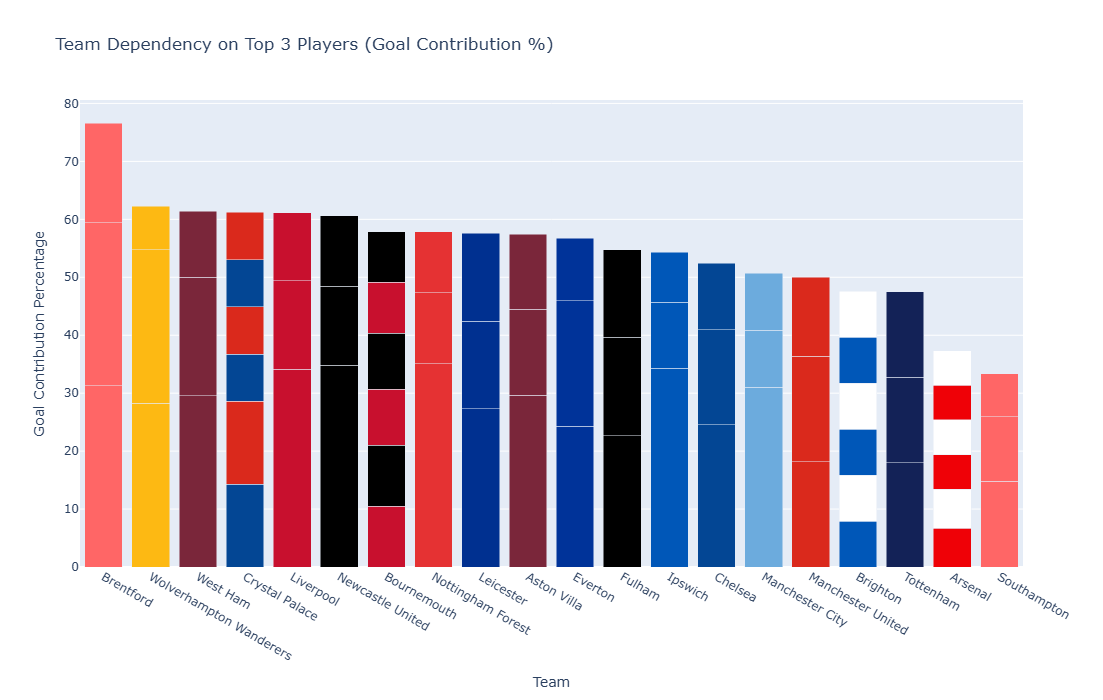

In [23]:
import plotly.graph_objects as go

# Prepare the data
plot_data = top_contributors[['Team', 'Player', 'Goal Contribution %']]

# Sort teams by total contribution of top 3 players
team_dependency = plot_data.groupby('Team')['Goal Contribution %'].sum().sort_values(ascending=False).index

# Order teams correctly
plot_data['Team'] = pd.Categorical(plot_data['Team'], categories=team_dependency, ordered=True)
plot_data = plot_data.sort_values(['Team', 'Goal Contribution %'], ascending=[True, False])

# Define team colors
team_colors = {
    'Liverpool': ['#C8102E'],                      
    'Manchester United': ['#DA291C'],              
    'Nottingham Forest': ['#E53233'],              
    'Bournemouth': ['#C8102E', '#000000'],         
    'Manchester City': ['#6CABDD'],                
    'Brighton': ['#0057B8', '#FFFFFF'],            
    'Chelsea': ['#034694'],                      
    'Newcastle United': ['#000000'],   
    'Fulham': ['#000000'],             
    'Aston Villa': ['#7A263A'],                   
    'West Ham': ['#7A263A'],                   
    'Brentford': ['#FF6666'],       
    'Southampton': ['#FF6666'],         
    'Arsenal': ['#EF0107', '#FFFFFF'],            
    'Crystal Palace': ['#034694', '#DA291C'],   
    'Ipswich': ['#0057B8'],                    
    'Everton': ['#003399'],                       
    'Leicester': ['#003090'],                   
    'Wolverhampton Wanderers': ['#FDB913'],      
    'Tottenham': ['#132257']                    
}

fig = go.Figure()

for team in team_dependency:
    team_data = plot_data[plot_data['Team'] == team]
    colors = team_colors[team]

    for idx, row in team_data.iterrows():
        player = row['Player']
        value = row['Goal Contribution %']

        if len(colors) == 2:
            fig.add_trace(go.Bar(
                x=[team],
                y=[value / 2],  
                name=f"{player} (Part 1)",
                marker_color=colors[0],
                hovertemplate=f'<b>{player}</b><br>Team: {team}<br>Contribution: {value:.2f}%'
            ))
            fig.add_trace(go.Bar(
                x=[team],
                y=[value / 2], 
                name=f"{player} (Part 2)",
                marker_color=colors[1],
                hovertemplate=f'<b>{player}</b><br>Team: {team}<br>Contribution: {value:.2f}%'
            ))
        else:
            fig.add_trace(go.Bar(
                x=[team],
                y=[value],
                name=player,
                marker_color=colors[0],
                hovertemplate=f'<b>{player}</b><br>Team: {team}<br>Contribution: {value:.2f}%'
            ))

fig.update_layout(
    barmode='stack',
    title='Team Dependency on Top 3 Players (Goal Contribution %)',
    xaxis_title='Team',
    yaxis_title='Goal Contribution Percentage',
    xaxis={'categoryorder': 'array', 'categoryarray': team_dependency},
    legend_title_text='Players',
    showlegend=False,
    height=700
)

fig.show()

---

To clearly illustrate how much each team depends on their top 3 players, donut charts were used, showing the proportion of:
- **Top 3 Players' Goal Contributions**
- **Rest of Team's Goal Contributions**

This visualization focused on:
- The Top 5 most player-dependent teams
- The Bottom 5 most balanced teams


In [24]:
# Calculate total goal contribution of top 3 players per team
team_dependency_summary = plot_data.groupby('Team')['Goal Contribution %'].sum().sort_values(ascending=False)

# Extract top 5 and bottom 5
top_5_teams = team_dependency_summary.head(5)
bottom_5_teams = team_dependency_summary.tail(5)

C:\Users\Admin\AppData\Local\Temp\ipykernel_4628\3811354912.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



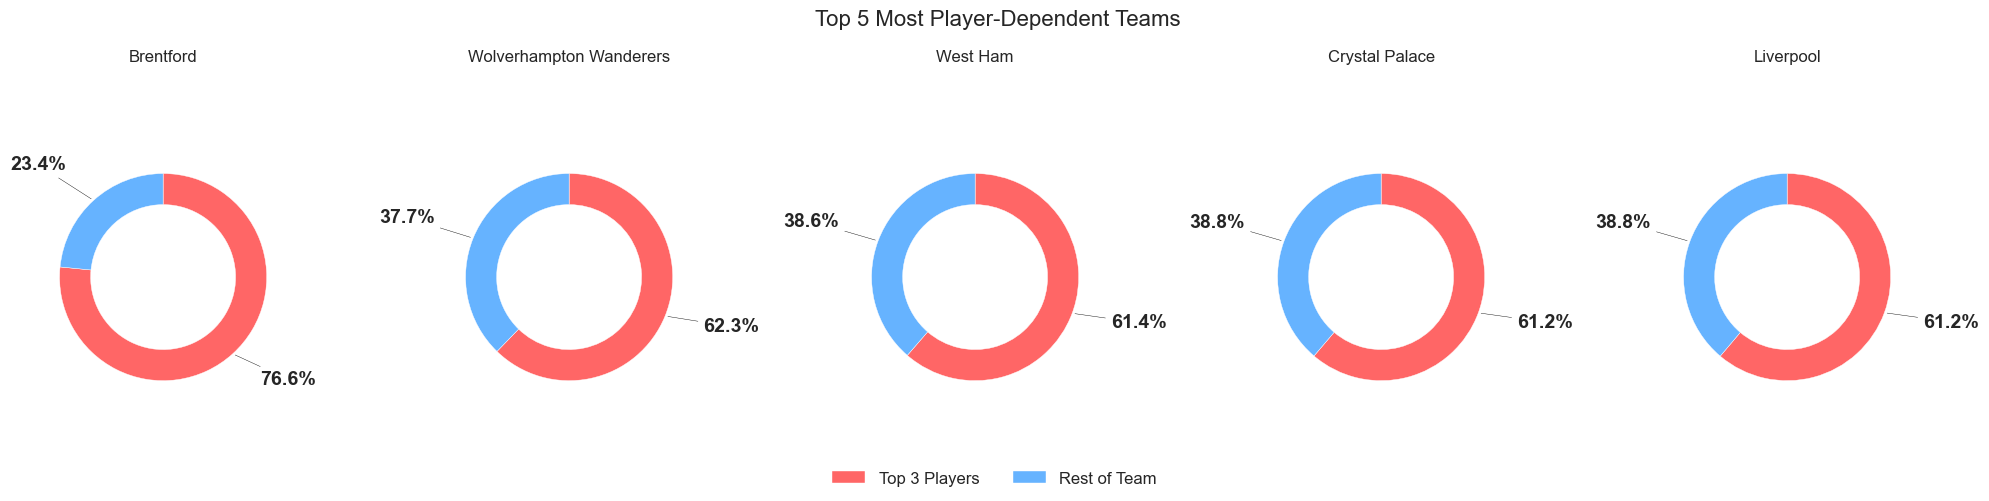

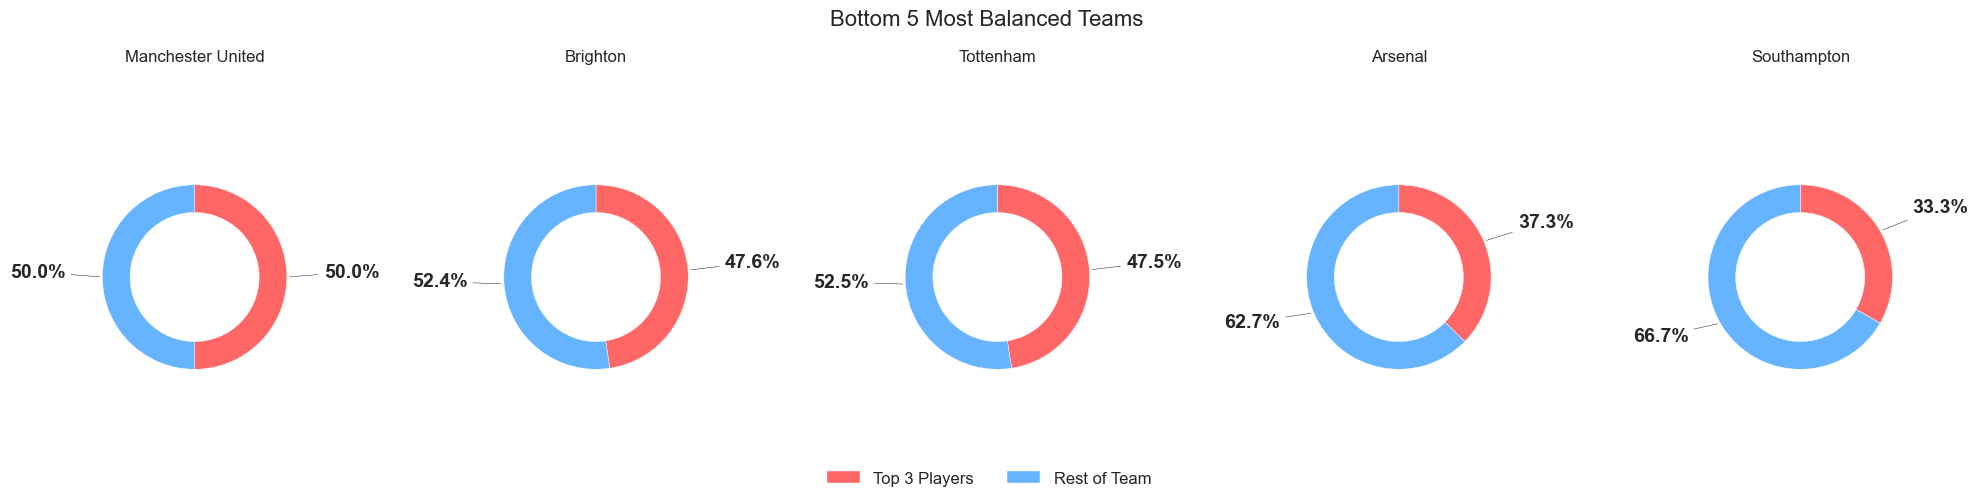

In [25]:
import matplotlib.pyplot as plt
import numpy as np

def plot_donut_chart(ax, team, contribution_pct, colors):
    sizes = [contribution_pct, 100 - contribution_pct]
    wedges, _ = ax.pie(
        sizes,
        colors=colors,
        startangle=90,
        counterclock=False,
        wedgeprops={'width': 0.3, 'edgecolor': 'white'}
    )

    
    for i, p in enumerate(wedges):
        ang = (p.theta2 - p.theta1) / 2. + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))

        horizontalalignment = 'left' if x > 0 else 'right'
        connectionstyle = "arc3" 

        ax.annotate(f'{sizes[i]:.1f}%', xy=(x, y), xytext=(1.4 * x, 1.4 * y),
                    horizontalalignment=horizontalalignment,
                    fontsize=14, fontweight='bold',
                    arrowprops=dict(arrowstyle='-', connectionstyle=connectionstyle, color='black'))

    ax.set_title(f'{team}', fontsize=12)
    ax.axis('equal')

colors = ['#ff6666', '#66b3ff']

# Plot Top 5 Teams
fig, axes = plt.subplots(1, 5, figsize=(20, 5))

for ax, (team, contribution) in zip(axes, top_5_teams.items()):
    plot_donut_chart(ax, team, contribution, colors)

plt.suptitle('Top 5 Most Player-Dependent Teams', fontsize=16)
plt.figlegend(['Top 3 Players', 'Rest of Team'], loc='lower center', ncol=2, fontsize=12)
plt.tight_layout()
plt.show()

# Plot Bottom 5 Teams
fig, axes = plt.subplots(1, 5, figsize=(20, 5))

for ax, (team, contribution) in zip(axes, bottom_5_teams.items()):
    plot_donut_chart(ax, team, contribution, colors)

plt.suptitle('Bottom 5 Most Balanced Teams', fontsize=16)
plt.figlegend(['Top 3 Players', 'Rest of Team'], loc='lower center', ncol=2, fontsize=12)
plt.tight_layout()
plt.show()


---
# Results: Player Reliance Across Teams

## Top 5 Most Player-Dependent Teams
These teams heavily relied on their top 3 players for the majority of their goals:

| Team                     | Top 3 Players' Goal Contribution (%) |
|--------------------------|-------------------------------------|
| **Brentford**            | **76.56%**                          |
| **Wolverhampton Wanderers** | **62.26%**                       |
| **West Ham**             | **61.36%**                          |
| **Crystal Palace**       | **61.22%**                          |
| **Liverpool**            | **61.18%**                          |

Brentford, in particular, stands out with **over three-fourths of their goals** contributed by just three players, indicating significant reliance.

---

### Bottom 5 Most Balanced Teams
These teams showed a more **balanced goal distribution** across their squad:

| Team                | Top 3 Players' Goal Contribution (%) |
|---------------------|-------------------------------------|
| **Manchester United** | **50.00%**                        |
| **Brighton**          | **47.62%**                        |
| **Tottenham**         | **47.54%**                        |
| **Arsenal**           | **37.31%**                        |
| **Southampton**       | **33.33%**                        |

Southampton and Arsenal, in particular, had **a highly distributed scoring pattern**, suggesting a greater team effort in goal contributions rather than dependence on a few key players.

---

### Key Takeaways:
- **High reliance** on a few players can be risky for teams in case of injuries, suspensions, or transfers.
- **More balanced teams** may be harder to defend against as their goals come from multiple sources.

---